In [4]:
%matplotlib inline
try:
    import cv2.cv2 as cv2
except:
    import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

def calculateDimRange(img):
    print 'Rango dinamico. Min=', np.min(img), '- Max =', np.max(img)
    

# Ejercicio 3

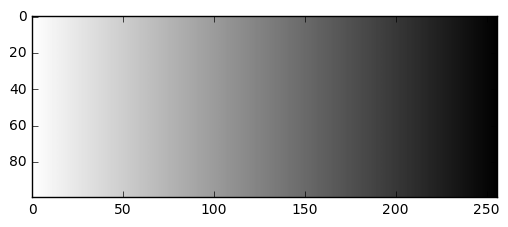

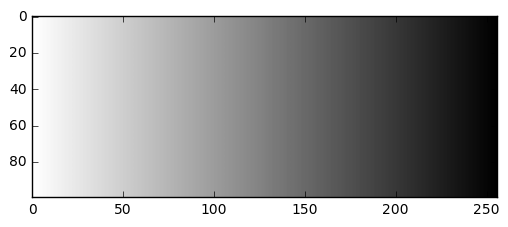

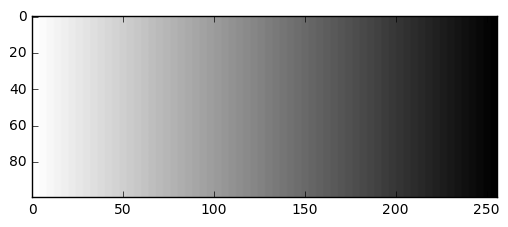

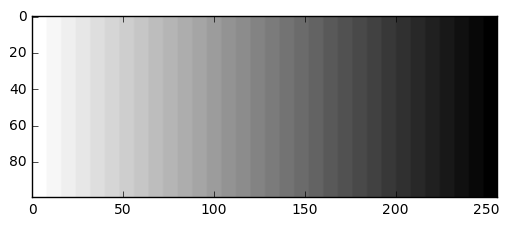

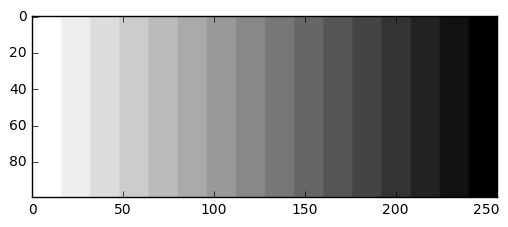

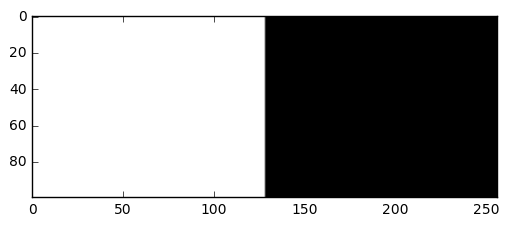

In [5]:
imagen = np.zeros((100,256),np.uint8)

for x in xrange(100):
    inv_gray_level = 0
    for j in xrange(256):
        imagen[x][j] = 255-inv_gray_level
        inv_gray_level+=1

def grayReduceScale(img,levels):
    n = 256 / levels
    img2 = np.copy(img)
    img2 = (img2/n)*n
    return img2
        
plt.figure()
plt.imshow(imagen,cmap='gray')
plt.figure()
plt.imshow(grayReduceScale(imagen,128),cmap='gray')
plt.figure()
plt.imshow(grayReduceScale(imagen,64),cmap='gray')
plt.figure()
plt.imshow(grayReduceScale(imagen,32),cmap='gray')
plt.figure()
plt.imshow(grayReduceScale(imagen,16),cmap='gray')
plt.figure()
plt.imshow(grayReduceScale(imagen,2),cmap='gray')

In [6]:
img = cv2.imread('fe8ab5cbf2d6d0968a144328cd0d9867--amazing-flowers-unusual-flowers.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
calculateDimRange(img)

img_cacao = cv2.imread('IMG_20170901_164434.jpg')
img_cacao = cv2.cvtColor(img_cacao,cv2.COLOR_RGB2GRAY)
calculateDimRange(img_cacao)

Rango dinamico. Min= 2 - Max = 238
Rango dinamico. Min= 0 - Max = 255


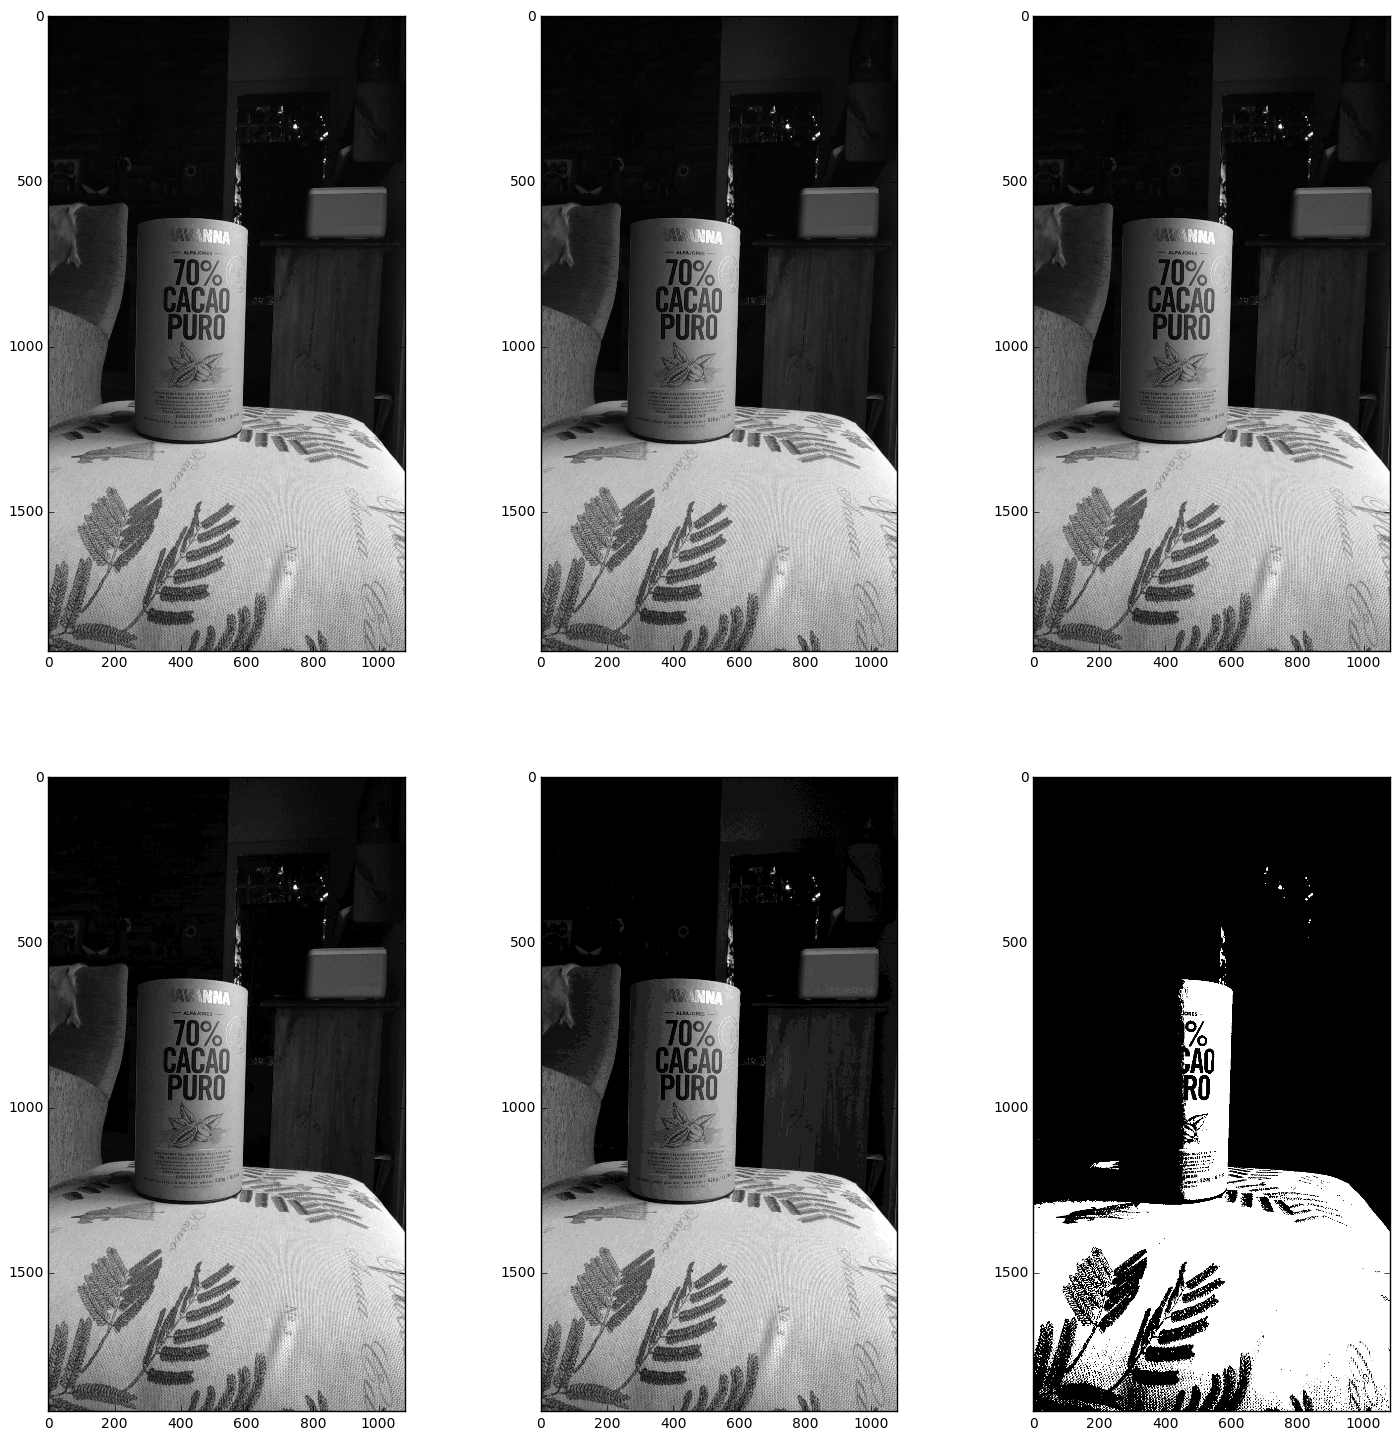

In [7]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(231)
ax1.imshow(img_cacao ,cmap='gray')
ax2 = fig.add_subplot(232)
ax2.imshow(grayReduceScale(img_cacao,128),cmap='gray')
ax3 = fig.add_subplot(233)
ax3.imshow(grayReduceScale(img_cacao,64),cmap='gray')
ax4 = fig.add_subplot(234)
ax4.imshow(grayReduceScale(img_cacao,32),cmap='gray')
ax5 = fig.add_subplot(235)
ax5.imshow(grayReduceScale(img_cacao,16),cmap='gray')
ax6 = fig.add_subplot(236)
ax6.imshow(grayReduceScale(img_cacao,2),cmap='gray')

En las imagenes anteriores podemos ver la imagen original tomada, luego la reducida a 128, 64, 32, 16 y 2 noveles respectivamente mirando la grilla de imagenes de izquierda a derecha de arriba hacia abajo. Podemos ver como al reducir los niveles de grises baja la calidad de la imagen. En 128 y 64 niveles la diferencia no se nota. Si miramos la de 32 niveles detenidamente podemos notar como en el tubo 'Havanna' sobre la silla se notan las 'columnas' de niveles de gris que varian desde altos niveles de intensidad desde la derecha (doreccion desde donde se percibe la luz) hacia bajos niveles de intensidad a la izquiera, luego con 16 y 2 niveles esto se hace mas notorio aún.

# Ejercicio 4

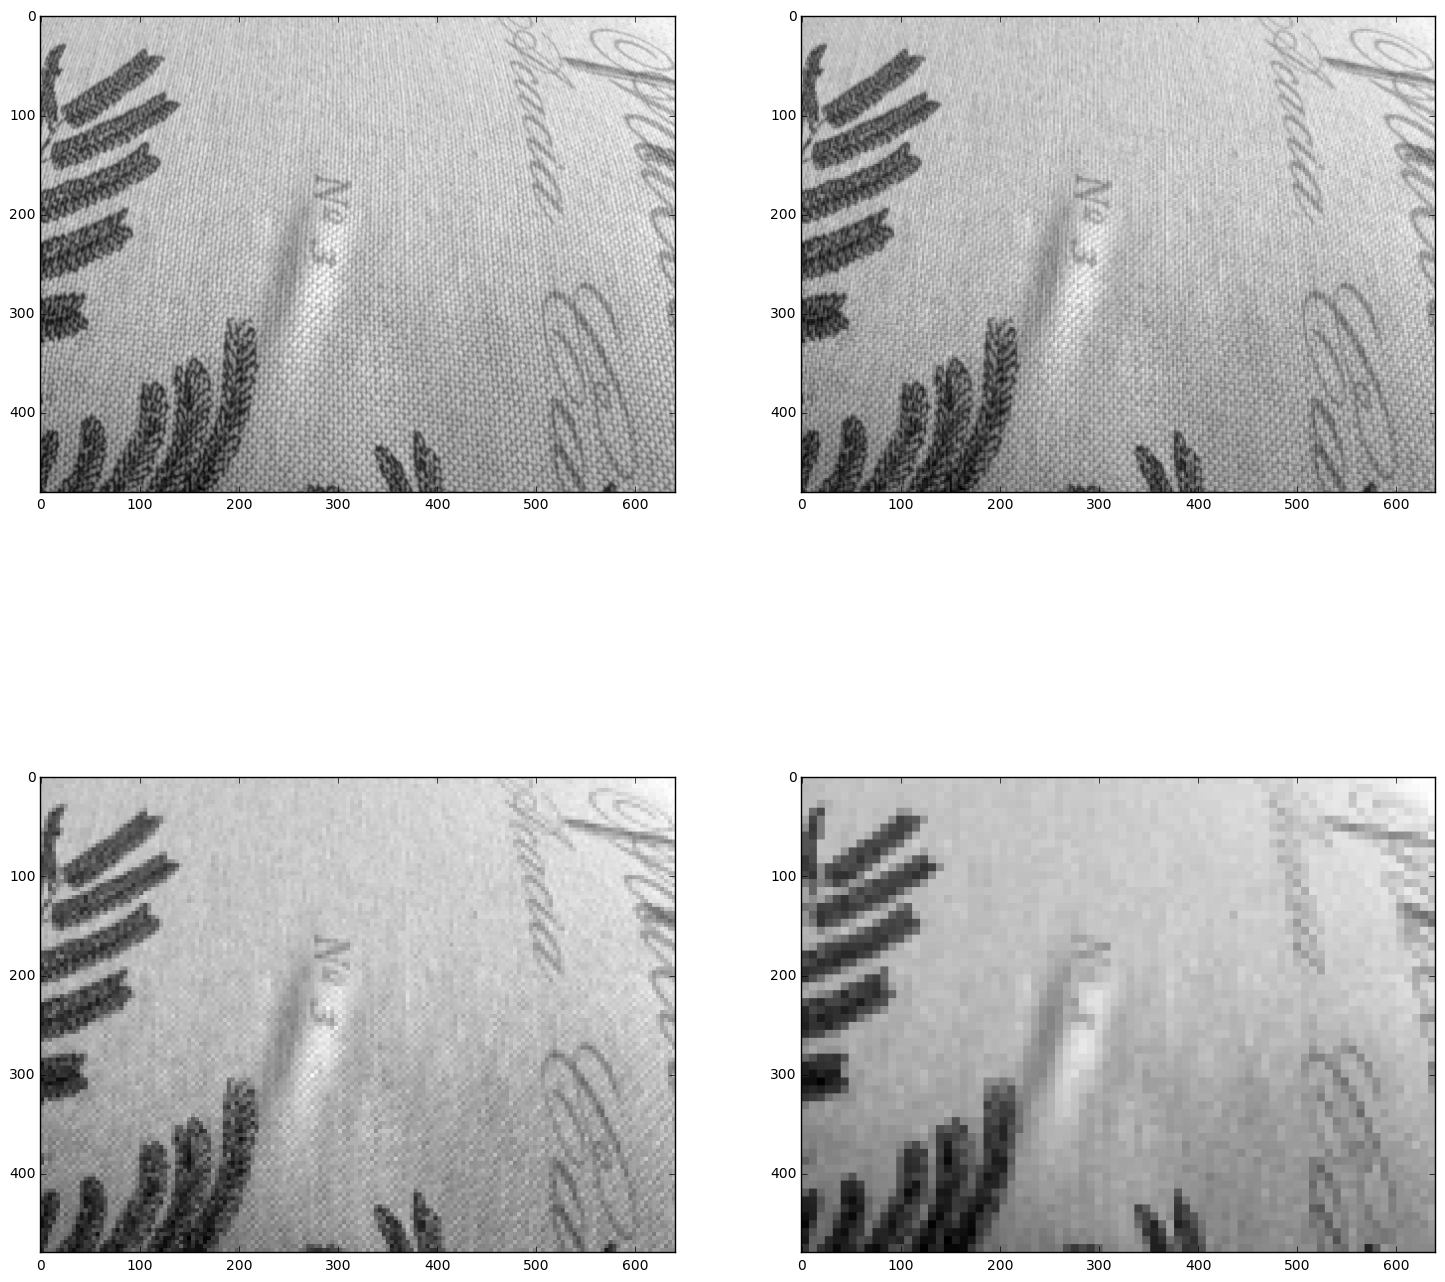

In [8]:
def resampleImage(img,size=(60,80)):
    x=0
    j=0
    roi = len(img)/size[0]
    img_out = np.zeros((len(img),len(img[0])),np.uint8)
    while x < len(img):
        while j < len(img[0]):
            img_out[x:x + roi, j:j + roi] = np.mean(img[x:x+roi,j:j+roi])
            j+=roi
        x += roi
        j = 0
    return img_out

img_cacao_640x480 = img_cacao[len(img_cacao)-481:len(img_cacao)-1,len(img_cacao[0])-641:len(img_cacao[0])-1]
resampleImage(img_cacao_640x480,(60,80))

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(222)
ax1.imshow(resampleImage(img_cacao_640x480,(240,320)) ,cmap='gray')
ax2 = fig.add_subplot(223)
ax2.imshow(resampleImage(img_cacao_640x480,(120,160)),cmap='gray')
ax3 = fig.add_subplot(224)
ax3.imshow(resampleImage(img_cacao_640x480,(60,80)),cmap='gray')
ax4 = fig.add_subplot(221)
ax4.imshow(img_cacao_640x480,cmap='gray')

La primera imagen que se muestra corresponde a un fragmento de tamaño 640x480 de la imagen usada en el punto anterior. Las otras tres imagenes mirando de izquierda a derecha, de arriba hacia abajo corresponden a los muestreos 320x240, 160x120 y 80x60 respectivamente. 
El remuestreo de una imagen a 800x600 no se puede hacer ya que es necesario aplicar otro metodo para reducciones o ampliaciones no exactas.
El efecto en la imagen es principalmente la perdida de calidad, al muestrear la imagen a una escala 2,4 y 8 veces menor a la original se puede ver como la forma de los objetos que aparecian en la imagen se van perdiendo, se dice que la imagen se ve pixelada porque el efecto es el mismo que hacer zoom sobre una imagen mas pequeña que la original entonces se logran ver sus pixeles "mas grandes". Por ejemplo, en el caso de 80x60 se llevo la imagen original a un tamaño 8 veces mas chico, por lo cual cuando retornamos esta imagen a su tamaño original vamos a ver los pixeles mas grandes - y eso es lo que se puede ver en la imagen.
El sentido del muestreo es el de poder mantener la forma de los objetos que aparecen en la imagen cuando se requiere una imagen mas chica, obviamente que dependiendo de que tipo de cambio de muestreo estemos usando el resultado sera mejor o peor.

# Ejercicio 5

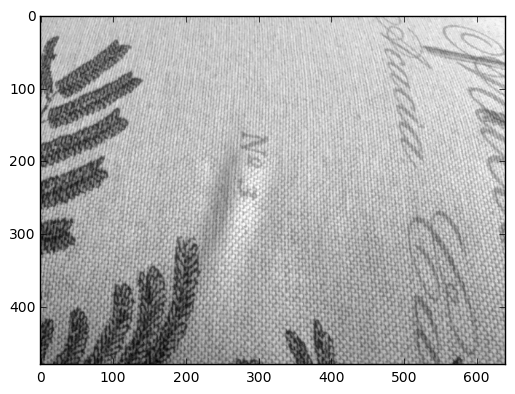

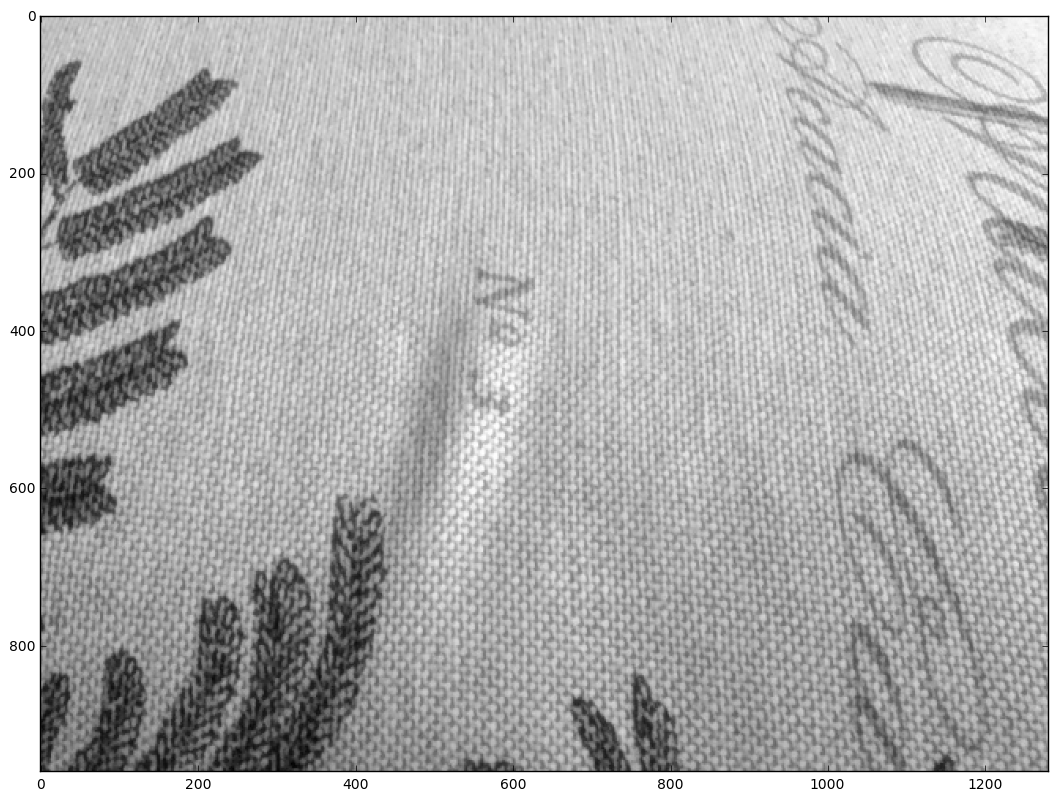

In [9]:
def zoomImage(img,n):
    x = 0
    j = 0
    img_out = np.zeros((len(img)*n, len(img[0])*n), np.uint8)
    while x < len(img):
        while j < len(img[0]):
            img_out[x*n:x*n + n, j*n:j*n + n] = img[x][j]
            j+=1
        j=0
        x += 1
    return img_out

# Solo para que las imagenes se vean en el tamaño correcto
my_dpi=96

fig = plt.figure(figsize=(640/my_dpi, 480/my_dpi), dpi=my_dpi)
plt.imshow(img_cacao_640x480 ,cmap='gray')
fig = plt.figure(figsize=((640*2)/my_dpi, (480*2)/my_dpi), dpi=my_dpi)
plt.imshow(zoomImage(img_cacao_640x480,2) ,cmap='gray')


Arriba se muestra primero la imagen original y luego la imagen con un zoom del 200%. La calidad de la imagen parece ser la misma, la forma de los objetos se mantiene, no se ve una imagen pixelada. La unica diferencia que se puede notar es que la imagen ampliada parece ser mas clara que la original.
La imagen no se podria ampliar a un 132% con este metodo ya que no seria <b>exacta</b> la replicacion de pixeles, es decir, quedarian pixeles sobre los cuales no sabriamos que decision tomar, si replicarlos o dejarlos como estan.

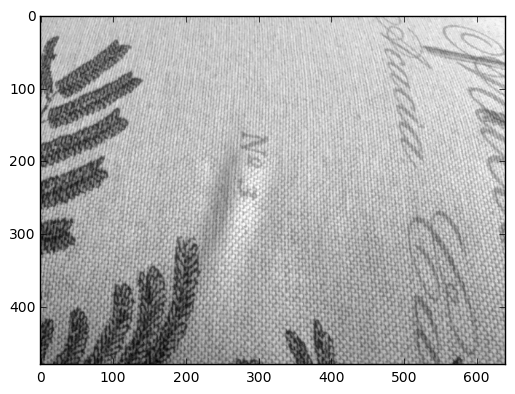

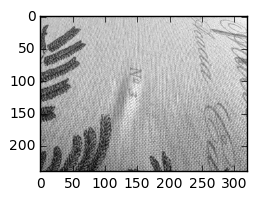

In [10]:
def shrinkImage(img,n):
    x = 0
    j = 0
    img_out = np.zeros((len(img)/n, len(img[0])/n), np.uint8)
    while x < len(img_out):
        while j < len(img_out[0]):
            img_out[x,j] = img[x*n][j*n]
            j+=1
        j=0
        x += 1
    return img_out

fig = plt.figure(figsize=(640/my_dpi, 480/my_dpi), dpi=my_dpi)
plt.imshow(img_cacao_640x480 ,cmap='gray')
fig = plt.figure(figsize=((640/2)/my_dpi, (480/2)/my_dpi), dpi=my_dpi)
plt.imshow(shrinkImage(img_cacao_640x480,2) ,cmap='gray')

Lo mismo que en caso anterior, la calidad de la imagen no se poerde, los objetos todavia se logran distinguir, no se pierde su forma. Si miramos las letras podemos notar que aun siguen siendo legibles. En este caso la imagen resultante del shrinking parece ser mas oscura.
De la misma forma que en el ejercicio anterior, no se podria hacer un shrinking del 32% con este metodo ya que en ciertos casos no se sabria si dejar o quitar columnas porque el shrinking no es exacto.

# Ejercicio 6
## a)

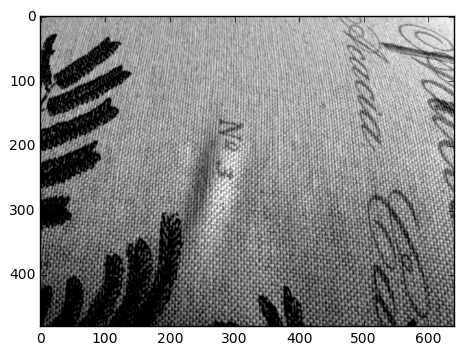

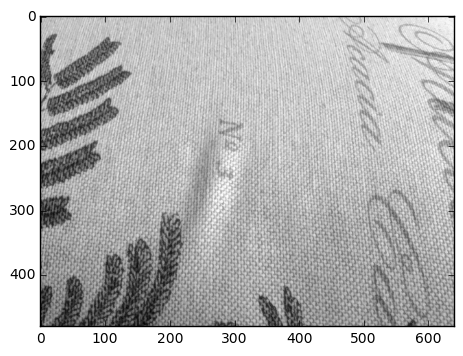

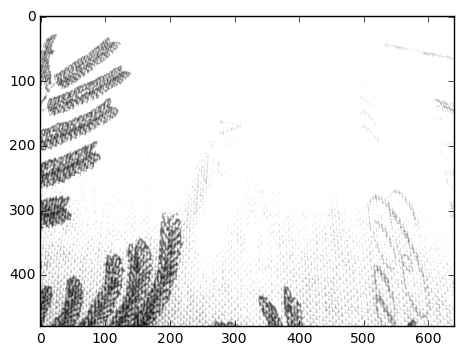

In [11]:
def shiftBright(img,escala):
    x=0
    j=0
    img_out = np.zeros((len(img), len(img[0])), np.uint8)
    while x < len(img_out):
        while j < len(img_out[0]):

            if img[x][j]+escala > 255:
                img_out[x, j] = 255
            elif img[x][j] + escala < 0:
                img_out[x, j] = 0
            else:
                img_out[x, j] = img[x][j] + escala

            j += 1
        j = 0
        x += 1
    return img_out


fig = plt.figure()
plt.imshow(shiftBright(img_cacao_640x480,-100) ,cmap='gray')
fig = plt.figure()
plt.imshow(img_cacao_640x480 ,cmap='gray')
fig = plt.figure()
plt.imshow(shiftBright(img_cacao_640x480,100),cmap='gray')

Para mejor comparacion se coloco la imagen original en el medio de las dos transformaciones.

## b) 

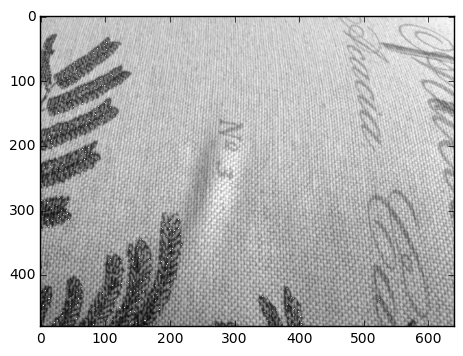

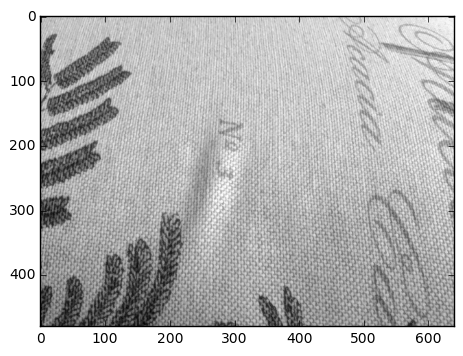

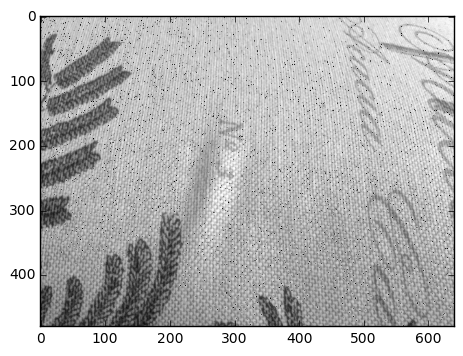

In [12]:
def replaceGrayLevel(img,grayLvl,repl):
    x=0
    j=0
    img_out = np.copy(img)
    while x < len(img_out):
        while j < len(img_out[0]):
            if img[x][j] == grayLvl:
                img_out[x, j] = repl
            j += 1
        j = 0
        x += 1
    return img_out

fig = plt.figure()
plt.imshow(replaceGrayLevel(img_cacao_640x480,80,255) ,cmap='gray')
fig = plt.figure()
plt.imshow(img_cacao_640x480 ,cmap='gray')
fig = plt.figure()
plt.imshow(replaceGrayLevel(img_cacao_640x480,190,0),cmap='gray')

En las imagenes de arriba se muestra la imagen original en el medio, la imagen original intercambiando el nivel de gris 80 por 255 (ruido tipo Sal) y en la imagen de mas abajo se intercambio la intensidad 190 por 0 (ruido tipo Pimienta).

## c)

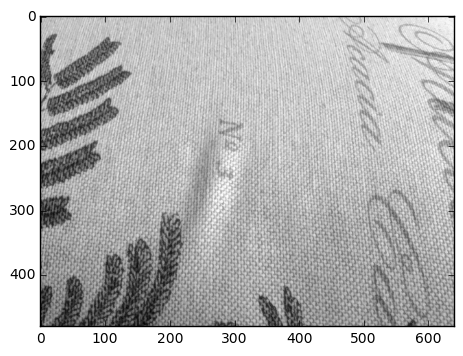

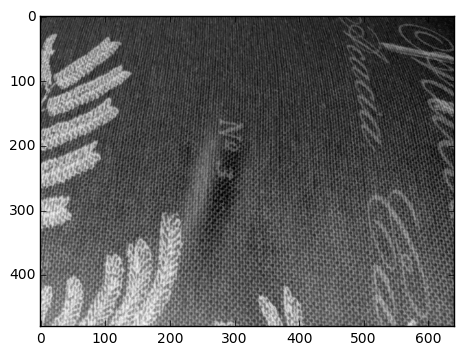

In [13]:
def negativo(img):
    #img_out = np.copy(img)-255
    x = 0
    j = 0
    img_out = np.copy(img)
    while x < len(img_out):
        while j < len(img_out[0]):
            img_out[x, j] = 255-img_out[x, j]
            j += 1
        j = 0
        x += 1
    
    return img_out

fig = plt.figure()
plt.imshow(img_cacao_640x480 ,cmap='gray')
fig = plt.figure()
plt.imshow(negativo(img_cacao_640x480),cmap='gray')

## d)

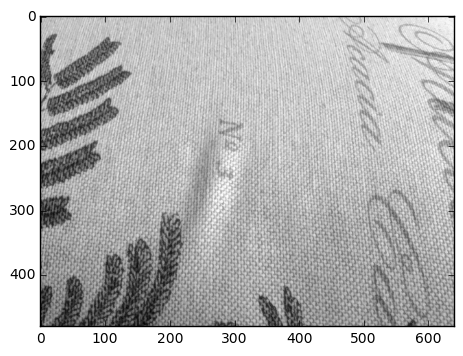

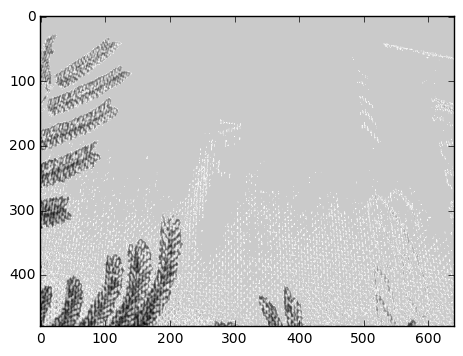

In [14]:
def replaceRange(img,range,repl):
    #img_out = np.copy(img)-255
    x = 0
    j = 0
    img_out = np.copy(img)
    while x < len(img_out):
        while j < len(img_out[0]):
            if img_out[x, j] >= range[0] and img_out[x, j] <= range[1]:
                img_out[x, j] = repl
            j += 1
        j = 0
        x += 1

    return img_out

fig = plt.figure()
plt.imshow(img_cacao_640x480 ,cmap='gray')
fig = plt.figure()
plt.imshow(replaceRange(img_cacao_640x480,(150,255),120),cmap='gray')

La funcion transformacion reemplaza un rango de valores de intensidad por un valor de intensidad especifico. El objetivo de reemplazar el rango (150,255) por el valor 120 es tratar de que permanezcan las flores de la imagen y eliminar todo el resto. Como podemos ver las flores permanecen en la imagen y solo quedan algunos rastros del resto como por ejemplo las letras.

# Ejercicio 7

## a)

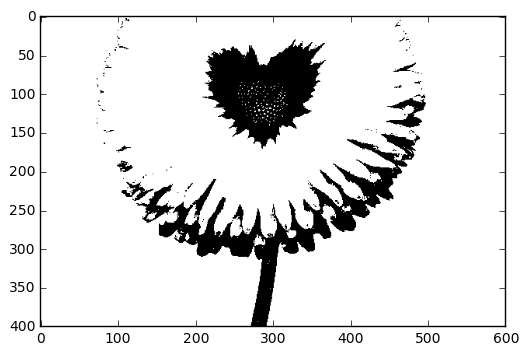

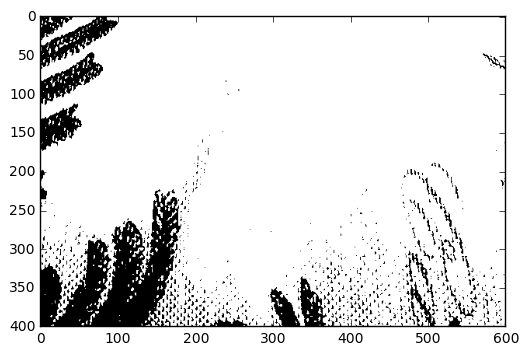

In [15]:
img_600x400 = img[len(img)-401:len(img)-1,len(img[0])-601:len(img[0])-1]
img_600x400_bin = replaceRange(img_600x400,(128,255),255)
img_600x400_bin = replaceRange(img_600x400_bin,(0,127),0)
fig = plt.figure()
plt.imshow(img_600x400_bin,cmap='gray')

img_cacao_600x400 = img_cacao[len(img_cacao)-401:len(img_cacao)-1,len(img_cacao[0])-601:len(img_cacao[0])-1]
img_cacao_600x400_bin = replaceRange(img_cacao_600x400,(128,255),255)
img_cacao_600x400_bin = replaceRange(img_cacao_600x400_bin,(0,127),0)
fig = plt.figure()
plt.imshow(img_cacao_600x400_bin,cmap='gray')

Se tomaron las dos imagenes iniciales, se les hizo un recorte de 600x400 en una parte de la imagen para que ambas tuvieran el mismo tamaño y asi poder aplicar los aperadores logicos. Se uso la funcion replaceRange() ya introducida en ejercicios anteriores para binarizar la imagen.<br>
En la imagen anterior se dividio el rango [0,255] en dos rangos [0,126] y [127,255] a los cuales se le imputaba el valor 0 y 255 respectivamente para realizar la binarizacion.

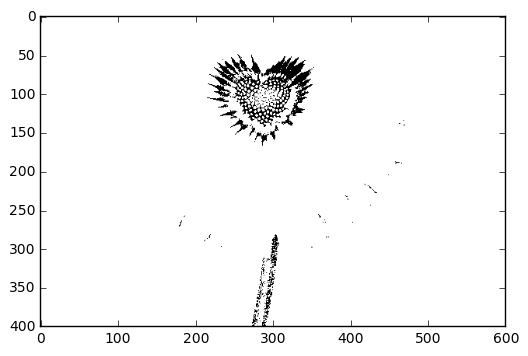

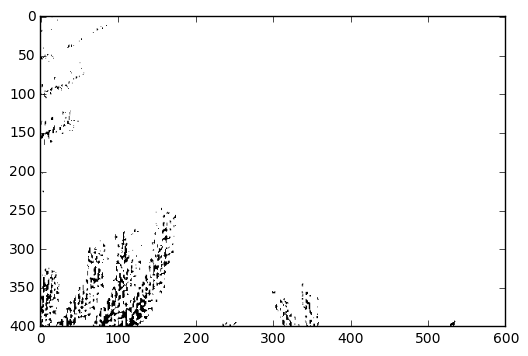

In [19]:
img_600x400_bin_2 = replaceRange(img_600x400,(60,255),255)
img_600x400_bin_2 = replaceRange(img_600x400_bin_2,(0,59),0)
fig = plt.figure()
plt.imshow(img_600x400_bin_2,cmap='gray')

img_cacao_600x400_bin_2 = replaceRange(img_cacao_600x400,(60,255),255)
img_cacao_600x400_bin_2 = replaceRange(img_cacao_600x400_bin_2,(0,59),0)
fig = plt.figure()
plt.imshow(img_cacao_600x400_bin_2,cmap='gray')

Ahora si definimos un rango mas pequeño para valores de intensidad mas bajo = [0,59] al cual se le imputa 0 y un rango mas grande [60,255] al cual se le imputa el valor 255 nos quedan imagenes totalmente diferentes a las anteriores y esto obviamente se debe al cambio de la escala elegida para la binarizacion.

## b)

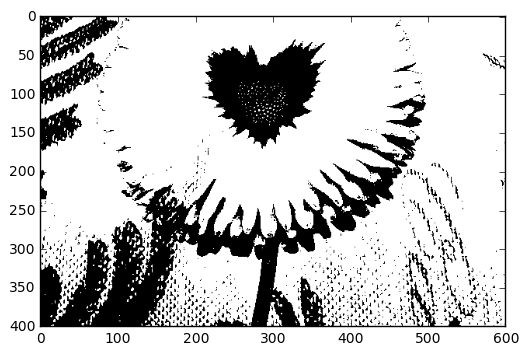

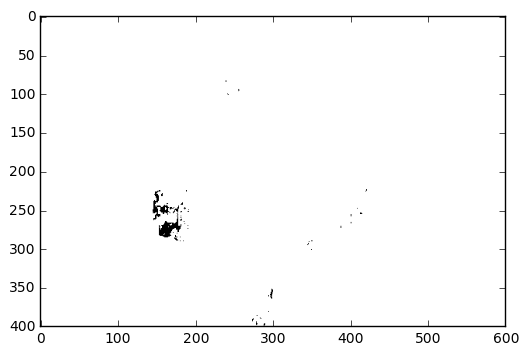

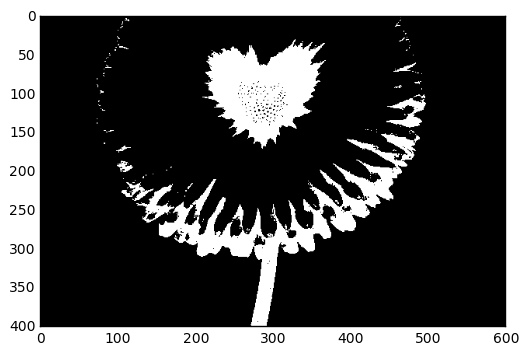

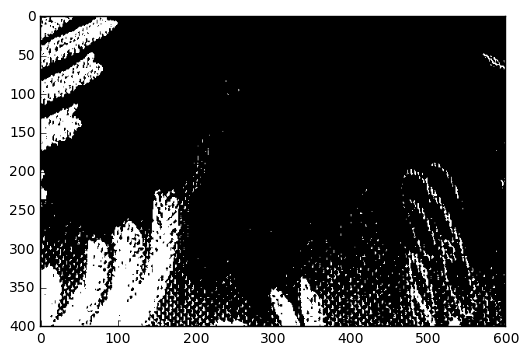

In [20]:
def binImagesOperate(img1,img2,opt='and'):
    x = 0
    j = 0
    img_out = np.zeros((len(img2), len(img2[0])), np.uint8)
    while x < len(img1):
        while j < len(img1[0]):
            if opt=='and':
                if img1[x, j] == 255 and img2[x, j] == 255:
                    img_out[x,j] = 255
                else:
                    img_out[x, j] = 0
            if opt=='or':
                if img1[x, j] == 255 or img2[x, j] == 255:
                    img_out[x,j] = 255
                else:
                    img_out[x, j] = 0
            j += 1
        j = 0
        x += 1
    return img_out


fig = plt.figure()
plt.imshow(binImagesOperate(img_cacao_600x400_bin,img_600x400_bin),cmap='gray')
fig = plt.figure()
plt.imshow(binImagesOperate(img_cacao_600x400_bin,img_600x400_bin,'or'),cmap='gray')
fig = plt.figure()
plt.imshow(negativo(img_600x400_bin),cmap='gray')
fig = plt.figure()
plt.imshow(negativo(img_cacao_600x400_bin),cmap='gray')

En las dos primeras imagenes de arriba podemos ver la aplicacion del AND y OR respectivamente de ambas imagenes. En las ultimas dos se puede ver el resultado del operarador NOT logrado con el negativo de la imagen.